<a href="https://colab.research.google.com/github/patty-13/DSA_TREAP_PROJECT/blob/main/Treaps_Project_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TREAPS

In [ ]:
from math import inf
import random

# Treap_Node defination
class Treap_Node:
  def __init__(self, key_value, priority = None):
    self.key_value = key_value
    self.left = None
    self.right = None
    self.priority = priority if priority is not None else random.randint(50, 200)


# Treap Class
class _Treap_:

  # Right rotation to balance the tree
  def right_rotate(self, y):
    x = y.left
    temp = x.right
    # y.left = x.right
    x.right = y
    y.left = temp
    return x

  # Left rotation to balance the tree
  def left_rotate(self, x):
    y = x.right
    temp = y.left

    # x.right = y.left
    y.left = x
    x.right = temp
    return y

# RESTRUCTER the nodes
  def _rotation_(self, node):
    if (node == None):
      return None

    # checking if the priority of left is less than root priority then right rotate
    if node.left and node.left.priority > node.priority:
      node = self.right_rotate(node)

    # checking if the priority of right is less than root priority then left rotate
    elif node.right and node.right.priority > node.priority:
      node = self.left_rotate(node)

    return node

# INSERT Function
  def insert(self, node, key_value, priority = None):

    # check if it is integer
    key_value = int(key_value) if isinstance(key_value, str) and key_value.isdigit() else key_value
    # if node is none, create a new node with key_value and priority
    # if priority is not defined by user it takes random value from (1, 100000)
    if (node == None):
      return Treap_Node(key_value, priority)

    # if the key value already exists, we return node with updated priority
    if (key_value == node.key_value):
      if(priority != None):
        node.priority = priority
      else:
        node.priority = random.randint(50, 200)
      node = self._rotation_(node)
      return node

    # if new value is less than node value
    if (key_value <= node.key_value):
       node.left = self.insert( node.left, key_value, priority)

    # if new value is more than node value
    else:
      node.right = self.insert( node.right, key_value, priority)

    # return the rotation if imbalanced after addition of new value
    node = self._rotation_(node)
    return node


# REMOVE FUNCTION
  def remove(self, node, key_value):
    # node is none return none
    if node is None:
        return None, None

    # setting delete priority as none
    del_priority = None

    # if key value is less than root node then traverse left tree
    if (key_value < node.key_value):
      node.left, deleted_priority = self.remove(node.left, key_value)
    # if key value is greater than root node then traverse right tree
    elif (key_value > node.key_value):
        node.right, deleted_priority = self.remove(node.right, key_value)
    else:

      del_priority = node.priority
      # if left node is none return right node
      if (node.left == None):
        return node.right, del_priority

      # if right node is none return left node
      elif (node.right == None):
        return node.left, del_priority

      # rotation to keep it balanced
      elif(node.left.priority < node.right.priority):
        node = self.right_rotate(node)
        node.right, _ = self.remove(node.right, key_value)
      else:
        node = self.left_rotate(node)
        node.left, _ = self.remove(node.left, key_value)

    if (node != None):
      node = self._rotation_(node)
    return node, del_priority


# FIND Function

  def find(self, node, key_value):

    # if node value is None or null then return error
    if (node == None):
      return 0

    # if node value is key_value itself return node
    if (node.key_value == key_value):
      return node.priority

    # if node value is > key_value traverse left subtree else right subtree
    if (node.key_value > key_value):
      return self.find(node.left, key_value)
    else:
      return self.find(node.right, key_value)

# SPLIT Function
  def split(self, node, key_value):
    if (node == None):
      return None, None

    # checking if the current split key is less the current node.key_value
    if (key_value < node.key_value):
      left, node.left = self.split(node.left, key_value)
      return left, node
    else:
      node.right, right = self.split(node.right, key_value)
      return node, right

# JOIN Function
  def join(self, left, right):

    if (left == None or right == None):
      if(left == None):
        return right
      else:
        return left

    if(left.priority > right.priority):
      left.right = self.join(left.right, right)
      return left
    else:
      right.left = self.join(left, right.left)
      return right


# SIZE Function
  def size(self, node):
    if (node == None):
      return 0
    else:
      return 1 + self.size(node.left) + self.size(node.right)

# DISPLAY FUNCTION
  def display(self, node, depth=0):
    if node is not None:
      self.display(node.left, depth + 1)
      print(" " * 4 * depth + f"{node.key_value}({node.priority})")
      self.display(node.right, depth + 1)




In [ ]:
# PART-1 IMPLEMENTATION
if __name__ == '__main__':
  treap = _Treap_()
  root = None

  print("Enter the operations")
  # print("\nEnter 1. for insertWithPriority = insert(key, priority)")
  # print("\nEnter 2. for insertWithRandom = insert(key)")
  # print("\nEnter 3. for remove = remove(key)")
  # print("\nEnter 4. for find = find(key)")
  # print("\nEnter 5. for split = split(key)")
  # print("\nEnter 6. for join = join(key)")
  # print("\nEnter 7. for Exit")
  while(True):
    print("\n1.-- insertWithPriority \n2.-- insertWithRandom \n3.-- remove \n4.-- find \n5.-- split \n6.-- join \n7.-- Display \n8.-- Exit")
    choice = input('Enter Operation ')

    # INSERT WITH PRIORITY
    if(choice == '1'):
      key_priority = input("Enter key and priority: ")
      key, priority = key_priority.split(" ")
      root = treap.insert(root, key, priority)
      treap_size = treap.size(root)
      print(f"Printing treap of size: {treap_size}")
      print("\n")
      treap.display(root)
      print("\n")

    # INSERT RANDOMLY
    elif (choice == '2'):
      key = input("Enter key: ")
      root = treap.insert(root, key, None)
      treap_size = treap.size(root)
      print(f"Printing treap of size: {treap_size}")
      print("\n")
      treap.display(root)
      print("\n")

    # REMOVE
    elif (choice == '3'):
      del_key = input("Enter key to remove: ")
      root, deleted_priority = treap.remove(root, del_key)
      if(deleted_priority == None):
        print(f"Removed {del_key} not found in treap")
      else:
        print(f"Removed key: {del_key}, priority value: {deleted_priority}")
      treap_size = treap.size(root)
      print(f"Printing treap of size: {treap_size}")
      print("\n")
      treap.display(root)
      print("\n")

      # FIND
    elif (choice == '4'):
      find_key = input("Enter key to find")
      priority_found = treap.find(root, find_key)
      if(priority_found == 0):
        print(f"Key {find_key} not exists")
      else:
        print(f"key: {find_key}, priority: {priority_found} found")
      treap_size = treap.size(root)
      print(f"Printing treap of size: {treap_size}")
      print("\n")
      treap.display(root)
      print("\n")

    #SPLIT
    elif (choice == '5'):
      split_key = input("Enter split key: ")
      print("\n")
      left_side, right_side = treap.split(root, split_key)
      print("Left split: ")
      left_size = treap.size(left_side)
      print(f"Printing treap of size: {left_size}")
      treap.display(left_side)

      print("\nRight split: ")
      print("\n")
      right_size = treap.size(right_side)
      print(f"Printing treap of size: {right_size}")
      treap.display(right_side)
      print("\n")

    # JOIN
    elif (choice == '6'):
      root = treap.join(left_side, right_side)
      print("After join:")
      treap_size = treap.size(root)
      print(f"Printing treap of size: {treap_size}")
      print("\n")
      treap.display(root)
      print("\n")

    # DISPLAY
    elif(choice == '7'):
      treap.display(root)

    # EXIT
    elif (choice == '8'):
      break
    else:
      print("Invalid choice")

In [ ]:
# PART-B IMPLEMENTATION
import random
import time

class MeasureTime:
  def __init__(self):
    self.startTime = 0
    self.cumulativeTime = 0
    self.stopTime = 0
    self.started = False

  def start(self):

    if not self.started:
      self.startTime = time.time_ns()
      self.started = True

  def stop(self):
    if self.started:
      self.stopTime  = time.time_ns()
      self.cumulativeTime += (self.stopTime - self.startTime)
      self.startTime = self.stopTime = 0
      self.started = False

  def reset(self):
    self.cumulativeTime = 0
    self.started = False

  def cumulative_Time(self):
    return self.cumulativeTime


def populate(treap, root,input_size, keys):

  for i in range(treap.size(root), input_size):
    root = treap.insert(root, keys[i])
  print(f"Treap populated to size: {treap.size(root)}")

def key_for_successful_find(sorted_key_arr, sample_size):
  return random.sample(sorted_key_arr, sample_size)

def keys_for_unsuccessful_find(sorted_key_arr, sample_size):

  lst = []
  while ( len(lst) <= sample_size):
    idx = random.randint(0, len(sorted_key_arr))
    if (idx == len(sorted_key_arr)):
      key = sorted_key_arr[-1] + 1
    else:
      key = sorted_key_arr[idx] -1

    if key not in lst:
      lst.append(key)
  return lst


def dump_performance_stats(cum_times, operation_names, input_size):

  operations = ["Insert", "Delete", "Find", "Split", "Join"]
  print(f"{'Operation':<10} | " + " | ".join([f"{size:<8}" for size in INPUT_SIZE]))
  print("-" * 10 + "+" + "-" * (9 * len(INPUT_SIZE) + len(INPUT_SIZE) - 1))
  for i, operation in enumerate(operations):
    times = [f"{cum_times[i][j]:<5.3f}" for j in range(len(INPUT_SIZE))]
    print(f"{operation:<10} | " + " | ".join(times))

def measure_performance(treap, root, keys, input_size, NUM_TRIALS, cum_times):

  timer = MeasureTime()
  timer1 = MeasureTime()
  operation_names = ["Insert", "Delete","Find","Split","Join"]
  for i, size in enumerate(input_size):
    root = populate(treap, root, size, keys)
    start_idx = input_size[i - 1] if i > 0 else 0
    end_idx = size
    sub_arr = sorted(keys[start_idx : end_idx])
    successful_keys = key_for_successful_find(sub_arr, NUM_TRIALS)
    unsuccessful_keys = keys_for_unsuccessful_find(sub_arr, NUM_TRIALS)

    timer.reset()
    for key in successful_keys:
      timer.start()
      treap.find(root,key)
      timer.stop()
    cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)

    timer.reset()
    for key in unsuccessful_keys:
      timer.start()
      treap.find(root,key)
      timer.stop()
    cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)
    cum_times[2][i] /= 2

    timer.reset()
    split_keys = successful_keys
    for key in split_keys:
      timer.start()
      left, right = treap.split(root,key)
      timer.stop()
      timer1.start()
      treap.join(left, right)
      timer1.stop()
    cum_times[3][i] += timer.cumulative_Time()/ (2*NUM_TRIALS)
    cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)

    timer.reset()
    un_split_keys = unsuccessful_keys
    for key in un_split_keys:
      timer.start()
      left, right = treap.split(root, key)
      timer.stop()
      timer1.start()
      treap.join(left, right)
      timer1.stop()
    cum_times[3][i] += timer.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[3][i] /= 2
    cum_times[4][i] /= 2

    timer.reset()
    for key in keys[size:size + NUM_TRIALS]:
      timer.start()
      root = treap.insert(root,key)
      timer.stop()
      timer1.start()
      root,_ = treap.remove(root,key)
      timer1.stop()
    cum_times[0][i] = timer.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[1][i] = timer1.cumulative_Time() / (2*NUM_TRIALS)

  dump_performance_stats(cum_times, operation_names, input_size)

if __name__ == '__main__':
  treap = _Treap_()
  INPUT_SIZE = [5000, 10000, 15000, 20000, 30000]
  NUM_TRIALS = 1000
  cum_times = [[0 for _ in range(len(INPUT_SIZE))] for _ in range(5)]
  key_size = INPUT_SIZE[-1] + NUM_TRIALS
  key = [2*i for i in range(key_size)]
  random.shuffle(key)
  keys = key[:]
  random.shuffle(keys)
  root = None
  measure_performance(treap, root, keys, INPUT_SIZE, NUM_TRIALS, cum_times)


Treap populated to size: 5000
Treap populated to size: 10000
Treap populated to size: 15000
Treap populated to size: 20000
Treap populated to size: 30000
Operation  | 5000     | 10000    | 15000    | 20000    | 30000   
----------+-------------------------------------------------
Insert     | 1822.026 | 1809.460 | 1768.557 | 1841.856 | 1789.748
Delete     | 1695.143 | 3378.182 | 5003.199 | 6698.472 | 9268.854
Find       | 468.282 | 451.581 | 429.702 | 448.553 | 366.763
Split      | 462.350 | 461.226 | 445.776 | 468.228 | 438.279
Join       | 710.933 | 2406.612 | 4062.787 | 5725.157 | 7385.945


In [ ]:
# PART-B IMPLEMENTATION
import random
import time

class MeasureTime:
  def __init__(self):
    self.startTime = 0
    self.cumulativeTime = 0
    self.stopTime = 0
    self.started = False

  def start(self):

    if not self.started:
      self.startTime = time.time_ns()
      self.started = True

  def stop(self):
    if self.started:
      self.stopTime  = time.time_ns()
      self.cumulativeTime += (self.stopTime - self.startTime)
      self.startTime = self.stopTime = 0
      self.started = False

  def reset(self):
    self.cumulativeTime = 0
    self.started = False

  def cumulative_Time(self):
    return self.cumulativeTime


def populate(treap, root,input_size, keys):

  for i in range(treap.size(root), input_size):
    root = treap.insert(root, keys[i])
  print(f"Treap populated to size: {treap.size(root)}")

def key_for_successful_find(sorted_key_arr, sample_size):
  return random.sample(sorted_key_arr, sample_size)

def keys_for_unsuccessful_find(sorted_key_arr, sample_size):

  lst = []
  while ( len(lst) <= sample_size):
    idx = random.randint(0, len(sorted_key_arr))
    if (idx == len(sorted_key_arr)):
      key = sorted_key_arr[-1] + 1
    else:
      key = sorted_key_arr[idx] -1

    if key not in lst:
      lst.append(key)
  return lst


def dump_performance_stats(cum_times, operation_names, input_size):

  operations = ["Insert", "Delete", "Find", "Split", "Join"]
  print(f"{'Operation':<10} | " + " | ".join([f"{size:<8}" for size in INPUT_SIZE]))
  print("-" * 10 + "+" + "-" * (9 * len(INPUT_SIZE) + len(INPUT_SIZE) - 1))
  for i, operation in enumerate(operations):
    times = [f"{cum_times[i][j]:<5.3f}" for j in range(len(INPUT_SIZE))]
    print(f"{operation:<10} | " + " | ".join(times))

def measure_performance(treap, root, keys, input_size, NUM_TRIALS, cum_times):

  timer = MeasureTime()
  timer1 = MeasureTime()
  operation_names = ["Insert", "Delete","Find","Split","Join"]
  for i, size in enumerate(input_size):
    root = populate(treap, root, size, keys)
    start_idx = input_size[i - 1] if i > 0 else 0
    end_idx = size
    sub_arr = sorted(keys[start_idx : end_idx])
    successful_keys = key_for_successful_find(sub_arr, NUM_TRIALS)
    unsuccessful_keys = keys_for_unsuccessful_find(sub_arr, NUM_TRIALS)

    timer.reset()
    for key in successful_keys:
      timer.start()
      treap.find(root,key)
      timer.stop()
    cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)

    timer.reset()
    for key in unsuccessful_keys:
      timer.start()
      treap.find(root,key)
      timer.stop()
    cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)
    cum_times[2][i] /= 2

    timer.reset()
    split_keys = successful_keys
    for key in split_keys:
      timer.start()
      left, right = treap.split(root,key)
      timer.stop()
      timer1.start()
      treap.join(left, right)
      timer1.stop()
    cum_times[3][i] += timer.cumulative_Time()/ (2*NUM_TRIALS)
    cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)

    timer.reset()
    un_split_keys = unsuccessful_keys
    for key in un_split_keys:
      timer.start()
      left, right = treap.split(root, key)
      timer.stop()
      timer1.start()
      treap.join(left, right)
      timer1.stop()
    cum_times[3][i] += timer.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[3][i] /= 2
    cum_times[4][i] /= 2

    timer.reset()
    for key in keys[size:size + NUM_TRIALS]:
      timer.start()
      root = treap.insert(root,key)
      timer.stop()
      timer1.start()
      root,_ = treap.remove(root,key)
      timer1.stop()
    cum_times[0][i] = timer.cumulative_Time() / (2*NUM_TRIALS)
    cum_times[1][i] = timer1.cumulative_Time() / (2*NUM_TRIALS)

  dump_performance_stats(cum_times, operation_names, input_size)

if __name__ == '__main__':
  treap = _Treap_()
  INPUT_SIZE = [5000, 10000, 15000, 20000, 30000]
  NUM_TRIALS = 1000
  cum_times = [[0 for _ in range(len(INPUT_SIZE))] for _ in range(5)]
  key_size = INPUT_SIZE[-1] + NUM_TRIALS
  key = [2*i for i in range(key_size)]
  random.shuffle(key)
  keys = key[:]
  random.shuffle(keys)
  root = None
  measure_performance(treap, root, keys, INPUT_SIZE, NUM_TRIALS, cum_times)


Treap populated to size: 5000
Treap populated to size: 10000
Treap populated to size: 15000
Treap populated to size: 20000
Treap populated to size: 30000
Operation  | 5000     | 10000    | 15000    | 20000    | 30000   
----------+-------------------------------------------------
Insert     | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000
Delete     | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000
Find       | 850645420457538048.00000 | 850645420529487360.00000 | 850645420678156928.00000 | 850645420848691712.00000 | 850645421146618240.00000
Split      | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000
Join       | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000


In [16]:
from math import inf
import random
import time
import pandas as pd

# Treap_Node defination
class Treap_Node:
  def __init__(self, key_value, priority = None):
    self.key_value = key_value
    self.left = None
    self.right = None
    self.priority = priority if priority is not None else random.randint(50, 200)


# Treap Class
class _Treap_:

  # Right rotation to balance the tree
  def right_rotate(self, y):
    x = y.left
    temp = x.right
    # y.left = x.right
    x.right = y
    y.left = temp
    return x

  # Left rotation to balance the tree
  def left_rotate(self, x):
    y = x.right
    temp = y.left

    # x.right = y.left
    y.left = x
    x.right = temp
    return y

# RESTRUCTER the nodes
  def _rotation_(self, node):
    if (node == None):
      return None

    # checking if the priority of left is less than root priority then right rotate
    if node.left and node.left.priority > node.priority:
      node = self.right_rotate(node)

    # checking if the priority of right is less than root priority then left rotate
    elif node.right and node.right.priority > node.priority:
      node = self.left_rotate(node)

    return node

# INSERT Function
  def insert(self, node, key_value, priority = None):

    # check if it is integer
    key_value = int(key_value) if isinstance(key_value, str) and key_value.isdigit() else key_value
    # if node is none, create a new node with key_value and priority
    # if priority is not defined by user it takes random value from (1, 100000)
    if (node == None):
      return Treap_Node(key_value, priority)

    # if the key value already exists, we return node with updated priority
    if (key_value == node.key_value):
      if(priority != None):
        node.priority = priority
      else:
        node.priority = random.randint(50, 200)
      node = self._rotation_(node)
      return node

    # if new value is less than node value
    if (key_value <= node.key_value):
       node.left = self.insert( node.left, key_value, priority)

    # if new value is more than node value
    else:
      node.right = self.insert( node.right, key_value, priority)

    # return the rotation if imbalanced after addition of new value
    node = self._rotation_(node)
    return node


# REMOVE FUNCTION
  def remove(self, node, key_value):
    # node is none return none
    if node is None:
        return None, None

    # setting delete priority as none
    del_priority = None

    # if key value is less than root node then traverse left tree
    if (key_value < node.key_value):
      node.left, deleted_priority = self.remove(node.left, key_value)
    # if key value is greater than root node then traverse right tree
    elif (key_value > node.key_value):
        node.right, deleted_priority = self.remove(node.right, key_value)
    else:

      del_priority = node.priority
      # if left node is none return right node
      if (node.left == None):
        return node.right, del_priority

      # if right node is none return left node
      elif (node.right == None):
        return node.left, del_priority

      # rotation to keep it balanced
      elif(node.left.priority < node.right.priority):
        node = self.right_rotate(node)
        node.right, _ = self.remove(node.right, key_value)
      else:
        node = self.left_rotate(node)
        node.left, _ = self.remove(node.left, key_value)

    if (node != None):
      node = self._rotation_(node)
    return node, del_priority


# FIND Function

  def find(self, node, key_value):

    # if node value is None or null then return error
    if (node == None):
      return 0

    # if node value is key_value itself return node
    if (node.key_value == key_value):
      return node.priority

    # if node value is > key_value traverse left subtree else right subtree
    if (node.key_value > key_value):
      return self.find(node.left, key_value)
    else:
      return self.find(node.right, key_value)

# SPLIT Function
  def split(self, node, key_value):
    if (node == None):
      return None, None

    # checking if the current split key is less the current node.key_value
    if (key_value < node.key_value):
      left, node.left = self.split(node.left, key_value)
      return left, node
    else:
      node.right, right = self.split(node.right, key_value)
      return node, right

# JOIN Function
  def join(self, left, right):

    if (left == None or right == None):
      if(left == None):
        return right
      else:
        return left

    if(left.priority > right.priority):
      left.right = self.join(left.right, right)
      return left
    else:
      right.left = self.join(left, right.left)
      return right


# SIZE Function
  def size(self, node):
    if (node == None):
      return 0
    else:
      return 1 + self.size(node.left) + self.size(node.right)

# DISPLAY FUNCTION
  def display(self, node, depth=0):
    if node is not None:
      self.display(node.left, depth + 1)
      print(" " * 4 * depth + f"{node.key_value}({node.priority})")
      self.display(node.right, depth + 1)


# PART-B IMPLEMENTATION

class MeasureTime:
  def __init__(self):
    self.startTime = 0
    self.cumulativeTime = 0
    self.stopTime = 0
    self.started = False

  def start(self):

    if not self.started:
      self.startTime = time.time_ns()
      self.started = True

  def stop(self):
    if self.started:
      self.stopTime  = time.time_ns()
      self.cumulativeTime += (self.stopTime - self.startTime)
      self.startTime = self.stopTime = 0
      self.started = False

  def reset(self):
    self.cumulativeTime = 0
    self.started = False

  def cumulative_Time(self):
    return self.cumulativeTime


def populate(treap, root,input_size, keys):

  for i in range(treap.size(root), input_size):
    root = treap.insert(root, keys[i])
  print(f"Treap populated to size: {treap.size(root)}")

def key_for_successful_find(sorted_key_arr, sample_size):
  return random.sample(sorted_key_arr, sample_size)

def keys_for_unsuccessful_find(sorted_key_arr, sample_size):

  lst = []
  while ( len(lst) <= sample_size):
    idx = random.randint(0, len(sorted_key_arr))
    if (idx == len(sorted_key_arr)):
      key = sorted_key_arr[-1] + 1
    else:
      key = sorted_key_arr[idx] -1

    if key not in lst:
      lst.append(key)
  return lst


def dump_performance_stats(cum_times, operation_names, input_size, all_data):

  # operations = ["Insert", "Delete", "Find", "Split", "Join"]
  # data = []
  # print(f"{'Operation':<10} | " + " | ".join([f"{size:<8}" for size in INPUT_SIZE]))
  # print("-" * 10 + "+" + "-" * (9 * len(INPUT_SIZE) + len(INPUT_SIZE) - 1))
  # for i, operation in enumerate(operations):
  #   time1 = [cum_times[i][j] for j in range(len(input_size))]
  #   data.append([operation] + time1)
  #   times = [f"{cum_times[i][j]:<5.3f}" for j in range(len(INPUT_SIZE))]
  #   print(f"{operation:<10} | " + " | ".join(times))
  #   df = pd.DataFrame(data, columns=['Operations'])
  #   print(df)
  operations = ["Insert", "Delete", "Find", "Split", "Join"]


  print(f"{'Operation':<10} | " + " | ".join([f"{size:<8}" for size in input_size]))
  print("-" * 10 + "+" + "-" * (9 * len(input_size) + len(input_size) - 1))

  for i, operation in enumerate(operations):
    time1 = [cum_times[i][j] for j in range(len(input_size))]
    data = [operation] + time1
    df = pd.DataFrame([data], columns = ['Operation'] + input_size)
    all_data = pd.concat([all_data, df], ignore_index = True)
    times = [f"{cum_times[i][j]:<5.3f}" for j in range(len(input_size))]
    print(f"{operation:<10} | " + " | ".join(times))

  return all_data

def measure_performance(treap, root, keys, input_size, NUM_TRIALS, cum_times):

  timer = MeasureTime()
  timer1 = MeasureTime()
  all_data = pd.DataFrame()
  operation_names = ["Insert", "Delete","Find","Split","Join"]
  for iteration in range(10):
    for i, size in enumerate(input_size):
      root = populate(treap, root, size, keys)
      start_idx = input_size[i - 1] if i > 0 else 0
      end_idx = size
      sub_arr = sorted(keys[start_idx : end_idx])
      successful_keys = key_for_successful_find(sub_arr, NUM_TRIALS)
      unsuccessful_keys = keys_for_unsuccessful_find(sub_arr, NUM_TRIALS)

      timer.reset()
      for key in successful_keys:
        timer.start()
        treap.find(root,key)
        timer.stop()
      cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)

      timer.reset()
      for key in unsuccessful_keys:
        timer.start()
        treap.find(root,key)
        timer.stop()
      cum_times[2][i] += timer.cumulative_Time() / (2* NUM_TRIALS)
      cum_times[2][i] /= 2

      timer.reset()
      split_keys = successful_keys
      for key in split_keys:
        timer.start()
        left, right = treap.split(root,key)
        timer.stop()
        timer1.start()
        treap.join(left, right)
        timer1.stop()
      cum_times[3][i] += timer.cumulative_Time()/ (2*NUM_TRIALS)
      cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)

      timer.reset()
      un_split_keys = unsuccessful_keys
      for key in un_split_keys:
        timer.start()
        left, right = treap.split(root, key)
        timer.stop()
        timer1.start()
        treap.join(left, right)
        timer1.stop()
      cum_times[3][i] += timer.cumulative_Time() / (2*NUM_TRIALS)
      cum_times[4][i] += timer1.cumulative_Time() / (2*NUM_TRIALS)
      cum_times[3][i] /= 2
      cum_times[4][i] /= 2

      timer.reset()
      for key in keys[size:size + NUM_TRIALS]:
        timer.start()
        root = treap.insert(root,key)
        timer.stop()
        timer1.start()
        root,_ = treap.remove(root,key)
        timer1.stop()
      cum_times[0][i] = timer.cumulative_Time() / (2*NUM_TRIALS)
      cum_times[1][i] = timer1.cumulative_Time() / (2*NUM_TRIALS)

    all_data = dump_performance_stats(cum_times, operation_names, input_size, all_data)
  return all_data
if __name__ == '__main__':
  treap = _Treap_()
  INPUT_SIZE = [5000, 10000, 15000, 20000, 30000]
  NUM_TRIALS = 1000
  cum_times = [[0 for _ in range(len(INPUT_SIZE))] for _ in range(5)]
  key_size = INPUT_SIZE[-1] + NUM_TRIALS
  key = [2*i for i in range(key_size)]
  random.shuffle(key)
  keys = key[:]
  root = None
  performance =measure_performance(treap, root, keys, INPUT_SIZE, NUM_TRIALS, cum_times)


Treap populated to size: 5000
Treap populated to size: 10000
Treap populated to size: 15000
Treap populated to size: 20000
Treap populated to size: 30000
Operation  | 5000     | 10000    | 15000    | 20000    | 30000   
----------+-------------------------------------------------
Insert     | 1669.398 | 3868.816 | 3300.508 | 974.100 | 911.655
Delete     | 1416.123 | 2873.113 | 3697.691 | 4535.243 | 5347.386
Find       | 377.195 | 381.242 | 451.695 | 221.274 | 242.129
Split      | 386.857 | 378.677 | 228.686 | 227.760 | 234.502
Join       | 586.955 | 2001.859 | 3224.275 | 4046.888 | 4876.300
Treap populated to size: 5000
Treap populated to size: 10000
Treap populated to size: 15000
Treap populated to size: 20000
Treap populated to size: 30000
Operation  | 5000     | 10000    | 15000    | 20000    | 30000   
----------+-------------------------------------------------
Insert     | 1012.889 | 997.083 | 1384.868 | 893.183 | 915.455
Delete     | 6180.730 | 7045.770 | 7979.591 | 8804.315 | 9

In [17]:
performance

,Operation,5000,10000,15000,20000,30000
0,Insert,1669.397500,3868.816500,3300.507500,974.099500,911.655000
1,Delete,1416.123000,2873.113500,3697.691500,4535.243000,5347.386500
2,Find,377.195250,381.242000,451.694750,221.274000,242.129000
3,Split,386.857000,378.676750,228.686000,227.760000,234.502500
4,Join,586.955000,2001.859000,3224.275250,4046.888000,4876.299750
5,Insert,1012.888500,997.083500,1384.867500,893.182500,915.454500
6,Delete,6180.729500,7045.770500,7979.591000,8804.314500,9658.574500
7,Find,420.629875,402.721250,439.059875,319.048500,335.401750
8,Split,435.515500,431.832375,334.230750,338.444750,339.363250
9,Join,5984.859000,7525.408250,8987.709375,10346.530750,11597.772625


In [18]:
df_reset = performance.reset_index(drop=True)

In [19]:
df_indexed = performance.set_index('Operation')

In [20]:
df_indexed

,5000,10000,15000,20000,30000
Operation,,,,,
Insert,1669.397500,3868.816500,3300.507500,974.099500,911.655000
Delete,1416.123000,2873.113500,3697.691500,4535.243000,5347.386500
Find,377.195250,381.242000,451.694750,221.274000,242.129000
Split,386.857000,378.676750,228.686000,227.760000,234.502500
Join,586.955000,2001.859000,3224.275250,4046.888000,4876.299750
Insert,1012.888500,997.083500,1384.867500,893.182500,915.454500
Delete,6180.729500,7045.770500,7979.591000,8804.314500,9658.574500
Find,420.629875,402.721250,439.059875,319.048500,335.401750
Split,435.515500,431.832375,334.230750,338.444750,339.363250


In [21]:
grouped_data = df_indexed.groupby('Operation').mean()

In [22]:
grouped_data

,5000,10000,15000,20000,30000
Operation,,,,,
Delete,23465.660500,24478.831550,25519.843250,26438.838550,27368.452700
Find,480.889296,479.239121,569.957929,456.667728,460.628813
Insert,1258.788800,1335.842900,1374.185650,1028.484450,997.336700
Join,37645.865839,39494.011518,41382.744037,43150.530822,44841.020422
Split,506.204287,501.995387,567.865449,467.872486,467.163738


<Figure size 640x480 with 0 Axes>

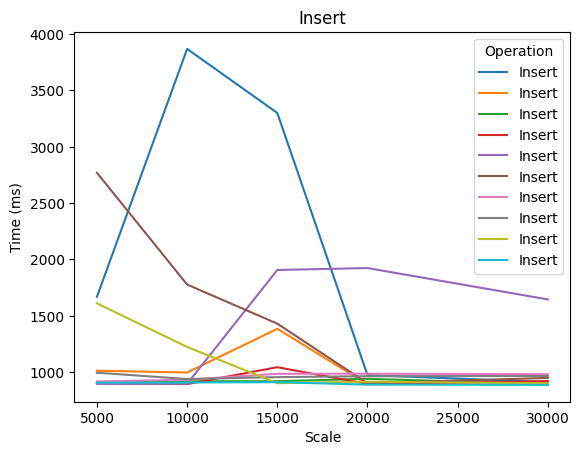

<Figure size 640x480 with 0 Axes>

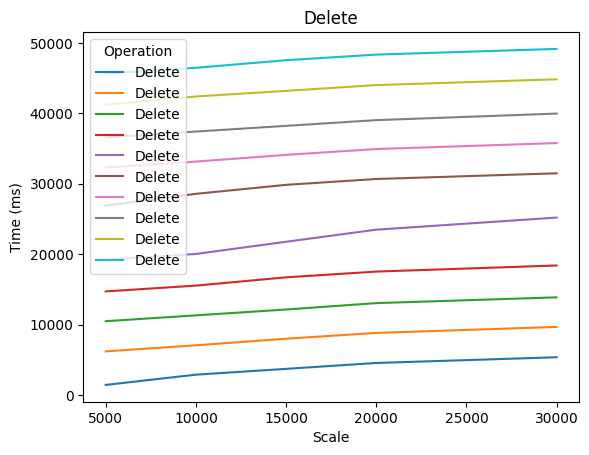

<Figure size 640x480 with 0 Axes>

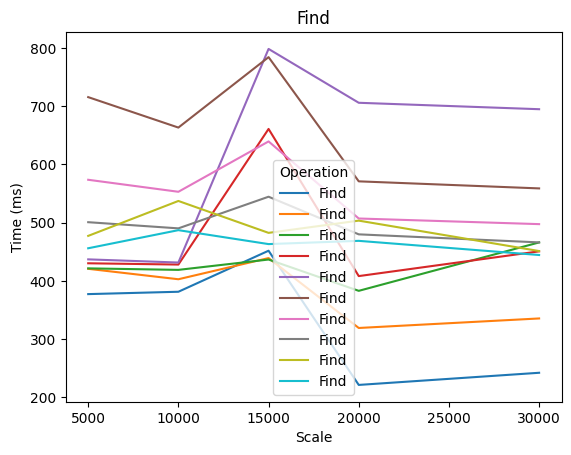

<Figure size 640x480 with 0 Axes>

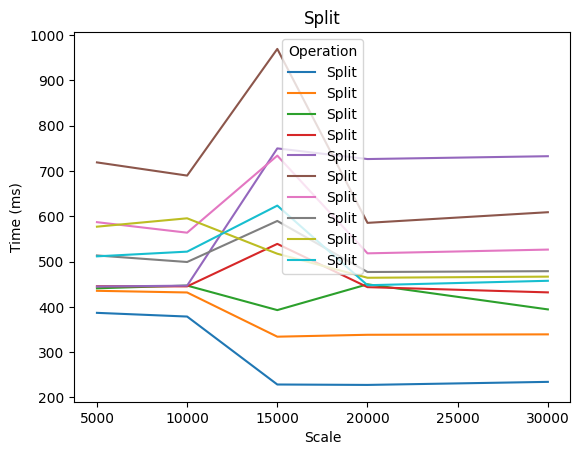

<Figure size 640x480 with 0 Axes>

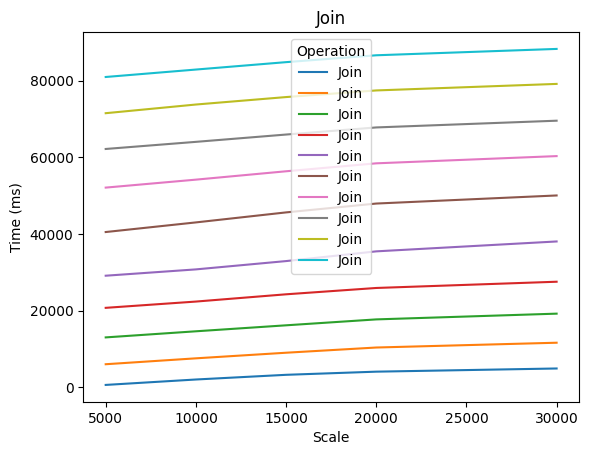

In [23]:
import matplotlib.pyplot as plt
for operation in df_indexed.index.unique():
    plt.figure()
    df_indexed.loc[operation].T.plot(kind='line', title=operation)
    plt.ylabel('Time (ms)')
    plt.xlabel('Scale')
    plt.show()

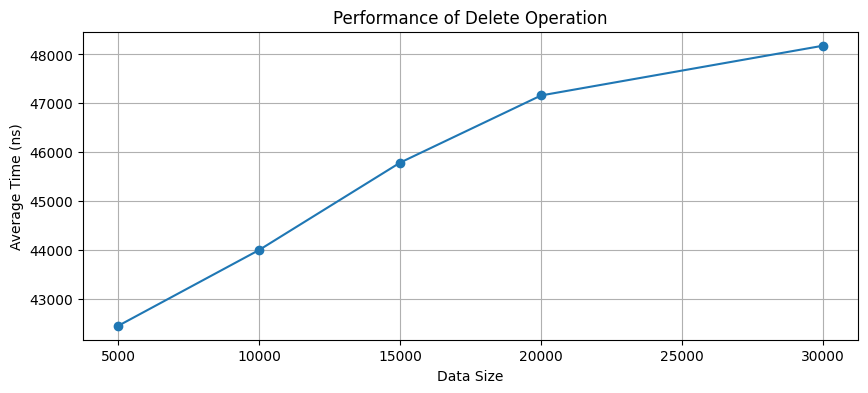

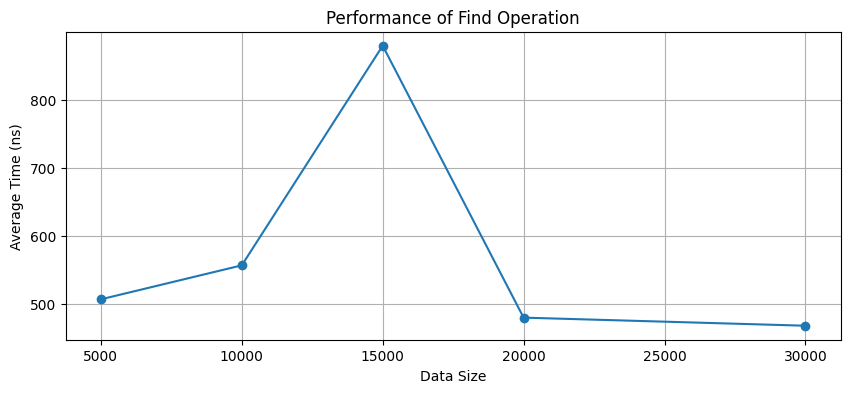

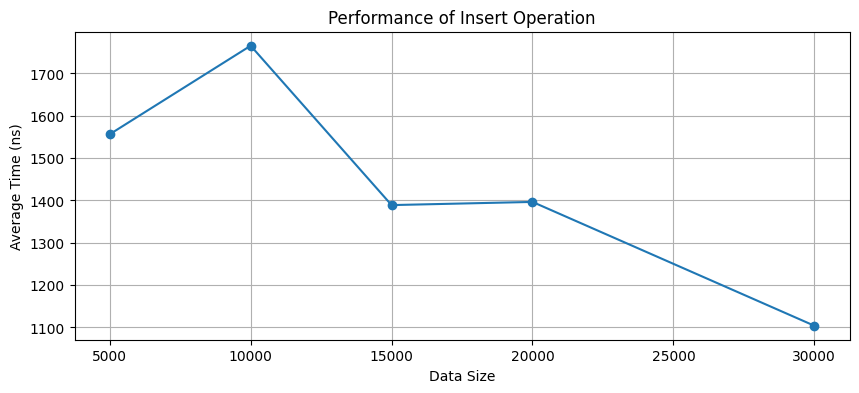

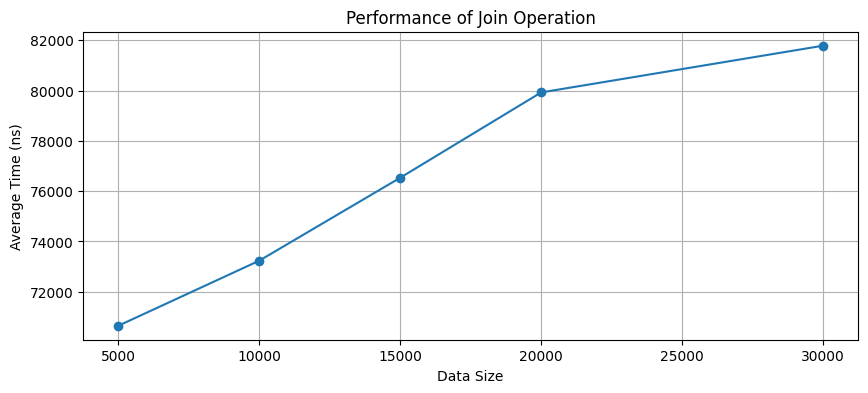

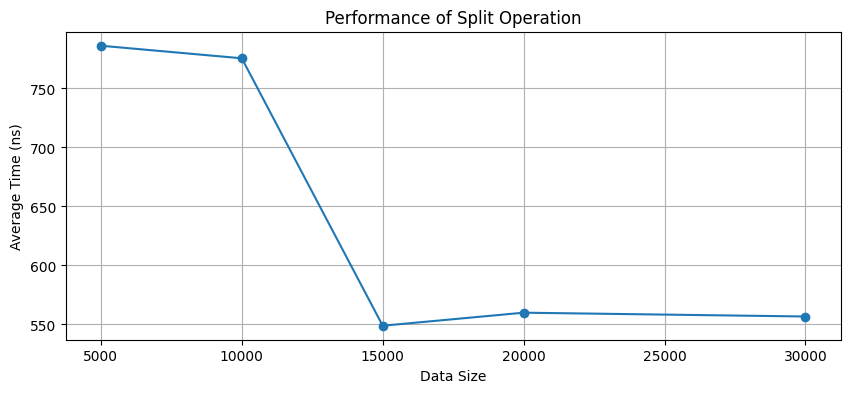

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "Size": [5000, 10000, 15000, 20000, 30000],
    "Delete": [42452.2257, 44002.69285, 45788.07685, 47161.0402, 48177.75],
    "Find": [506.687377, 556.595418, 879.207614, 479.783614, 467.902997],
    "Insert": [1556.48255, 1765.5842, 1389.125, 1396.59675, 1104.1499],
    "Join": [70647.94479, 73235.10308, 76532.05329, 79924.40606, 81782.67795],
    "Split": [786.239881, 775.576506, 548.877731, 559.926173, 556.693921]
}

# Creating DataFrame
df = pd.DataFrame(data)
df.set_index("Size", inplace=True)

# Plotting individual graphs for each operation
for operation in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[operation], marker='o', linestyle='-')
    plt.title(f'Performance of {operation} Operation')
    plt.xlabel('Data Size')
    plt.ylabel('Average Time (ns)')
    plt.grid(True)
    plt.show()
